In [1]:
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
import numpy as np
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

In [2]:
arr_cont = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats/contacts_{i:03d}.npy') for i in range(11)]

In [162]:
arr_ca = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats/ca_dists_{i:03d}.npy') for i in range(11)]

In [163]:
arr_coord = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats/coord_{i:03d}.npy') for i in range(11)]

In [2]:
arr4 = [pyemma.coordinates.load(f'../features_v1/t_new_{i:03d}.npy') for i in range(9)]

In [164]:
combo_ext = [np.concatenate([a1, a2,a3], axis=1) for a1, a2, a3, in zip(arr_cont, arr_ca, arr_coord )]


In [165]:
np.shape(combo_ext[1])

(908, 84)

In [168]:
tica_dev = pyemma.coordinates.tica(combo_ext, lag=20)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [38]:
tica_dev = pyemma.coordinates.tica(averaged_time_series, lag=100)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/9 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/9 [00:00<?, ?it/s]

In [41]:
concatenated_data = np.concatenate(averaged_time_series)

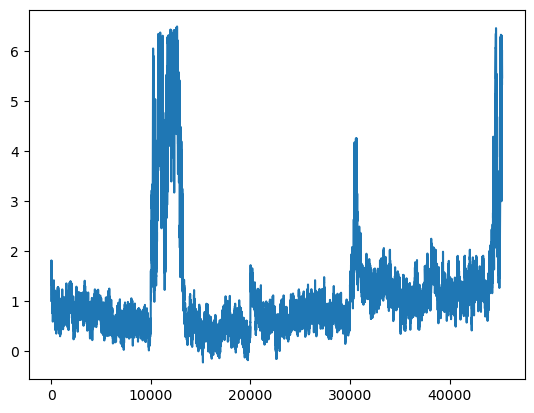

In [175]:
plt.plot(concatenated_data)

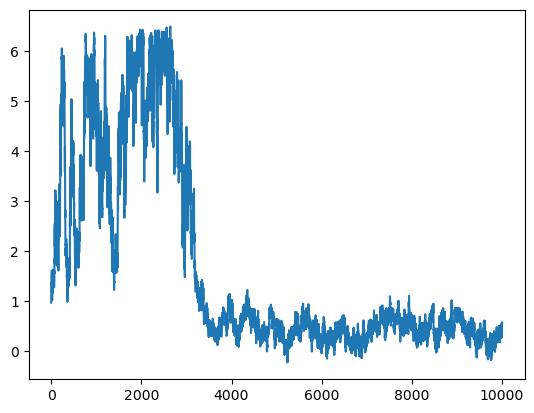

In [178]:
plt.plot(averaged_time_series[1])

In [81]:
np.shape(dtrajs)

(1, 98374)

In [87]:
# Remove the undesired trajectory
del averaged_time_series[1]

# Concatenate the remaining trajectories
concatenated_data = np.concatenate(averaged_time_series)


In [130]:
# Remove the undesired trajectory
del averaged_time_series[4]
# Remove the undesired trajectory
del averaged_time_series[5]

# Concatenate the remaining trajectories
concatenated_data = np.concatenate(averaged_time_series)


In [179]:
# Remove the undesired trajectory
del averaged_time_series[1]

# Concatenate the remaining trajectories
concatenated_data = np.concatenate(averaged_time_series)


In [131]:
# Create a list of discrete trajectories
dtrajs = cluster.dtrajs
split_indices = [len(traj) for traj in averaged_time_series]
discrete_trajs = np.split(dtrajs[0], np.cumsum(split_indices)[:-1])

# Construct the MSM using the list of discrete trajectories
msm = pyemma.msm.estimate_markov_model(discrete_trajs, lag=100)


In [90]:
np.shape(discrete_trajs[4])

(10001,)

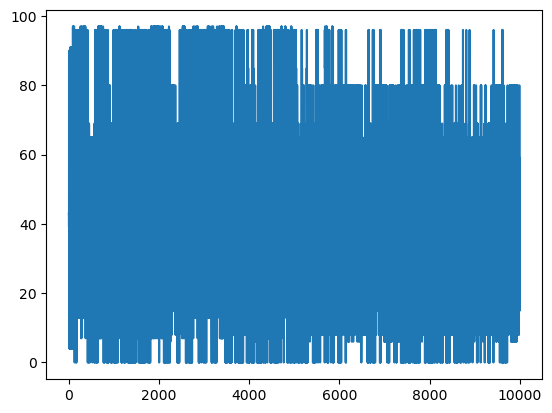

In [91]:
plt.plot(discrete_trajs[0])

In [180]:
n_clusters = 100  # You can adjust this based on your data and requirements
cluster = pyemma.coordinates.cluster_kmeans(concatenated_data.reshape(-1, 1), k=n_clusters, max_iter=50)


initialize kmeans++ centers:   0%|                      | 0/100 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

In [191]:
lag_time = 50# Adjust this based on your needs
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=lag_time)


estimating MaximumLikelihoodMSM:   0%|                    | 0/7 [00:00<?, ?it/s]

12-09-23 13:31:38 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[57] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


<Axes: xlabel='lag time / steps', ylabel='timescale / steps'>

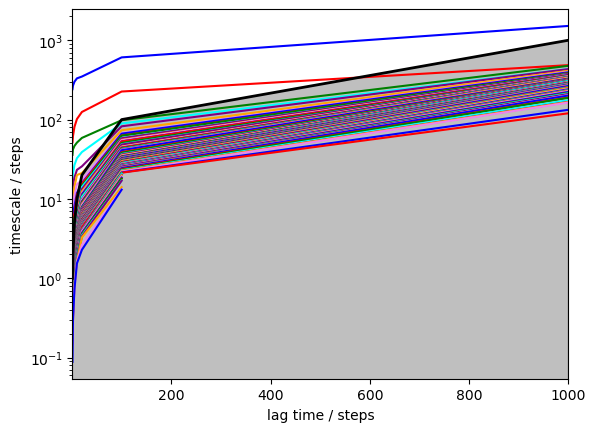

In [182]:
lags = [1, 2, 5, 10, 20,100,1000]  # A range of lag times for validation
its = pyemma.msm.its(cluster.dtrajs, lags=lags)

# You can then plot the implied timescales to check how many states are reliably separated
pyemma.plots.plot_implied_timescales(its)


In [192]:
stationary_distribution = msm.pi


In [193]:
mfpt_1_to_2 = msm.mfpt(0, 1)
mfpt_2_to_1 = msm.mfpt(1, 0)

In [194]:
mfpt_1_to_2

45975.00373909403

In [195]:
mfpt_2_to_1

3089.166950007721

In [196]:
pi = msm.stationary_distribution


In [197]:
cluster_centers = cluster.clustercenters[:, 0]
pmf_on_cluster_centers = -np.log(pi)


In [198]:
sorted_indices = np.argsort(cluster_centers)
cluster_centers_sorted = cluster_centers[sorted_indices]
pmf_sorted = pmf_on_cluster_centers[sorted_indices]


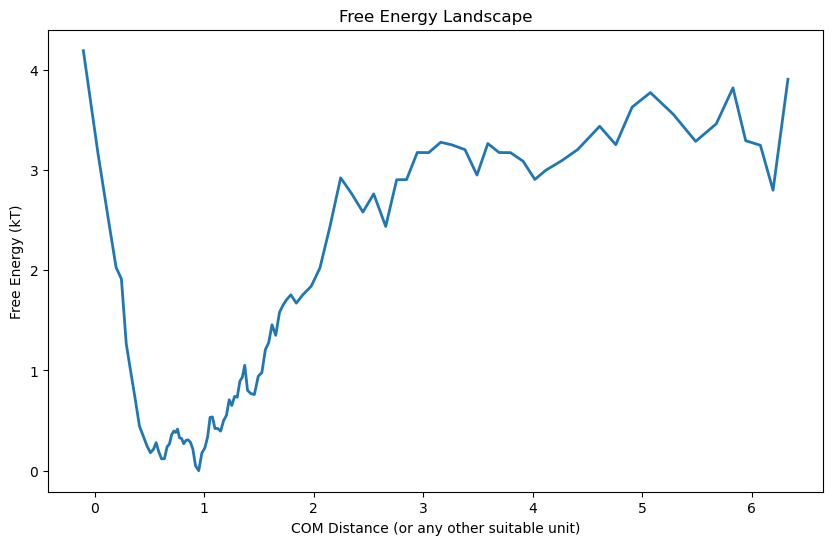

In [199]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_centers_sorted, pmf_sorted - np.min(pmf_sorted), linewidth=2)
plt.xlabel("COM Distance (or any other suitable unit)")
plt.ylabel("Free Energy (kT)")
plt.title("Free Energy Landscape")
plt.show()


TypeError: plot_density() missing 1 required positional argument: 'yall'

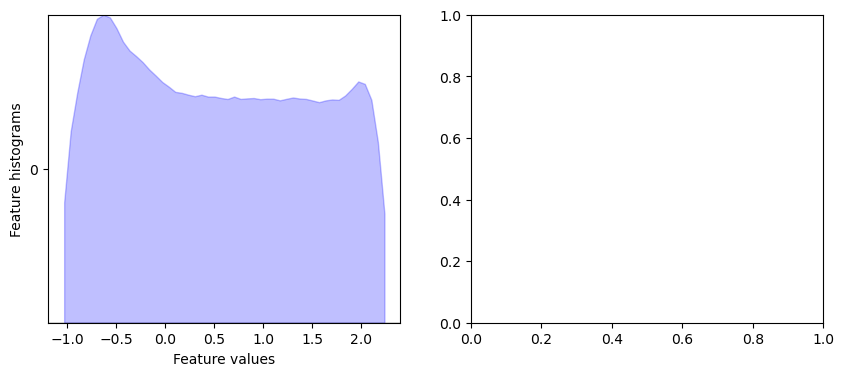

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

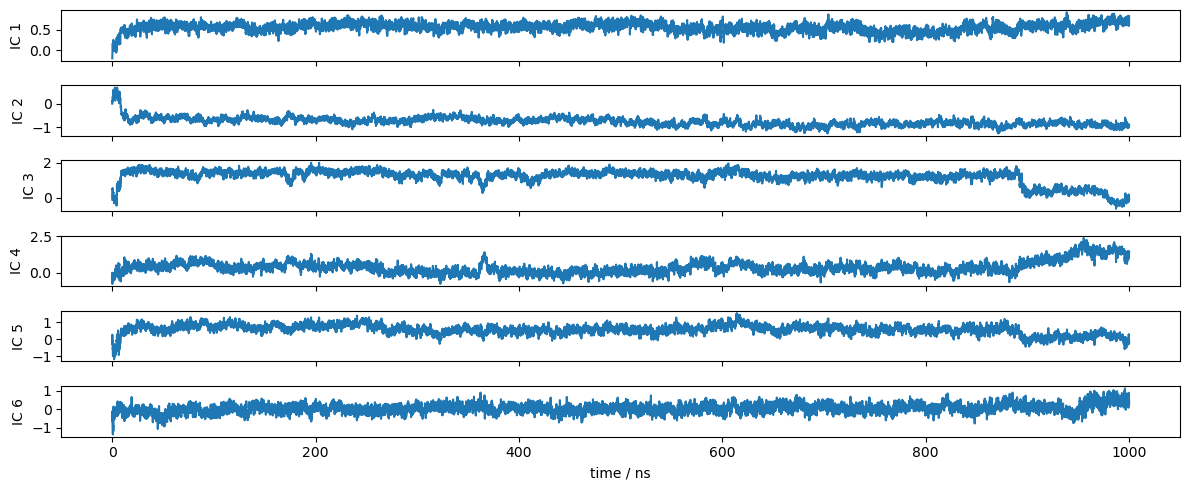

In [8]:
fig, axes = plt.subplots(6, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_out[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_out[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()
# plt.savefig('ics_update.png')

In [12]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=250, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                      | 0/250 [00:00<?, ?it/s]

kmeans iterations:   0%|                                | 0/200 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/9 [00:00<?, ?it/s]

In [9]:
# Extract the eigenvectors
eigenvectors = tica_dev.eigenvectors

# Normalize the eigenvectors
eigenvectors_normalized = eigenvectors / np.sum(np.abs(eigenvectors), axis=0)
# Choose which tIC to examine, 0 corresponds to the slowest
tIC_index = 2

# Get the weights for this tIC
weights = eigenvectors_normalized[:, tIC_index]

# If you have names for your 14 features you could pair them up with the weights for easier interpretation
feature_names = ['a','b','c','d','e','f','g','h','i','f','k','l','m','n']  # replace with your list of feature names

# Make a dictionary of feature names and weights
feature_weights = dict(zip(feature_names, weights))

# Sort dictionary by absolute weight
feature_weights_sorted = sorted(feature_weights.items(), key=lambda item: abs(item[1]), reverse=True)

# Print the features and their weights, in descending order of weight
for feature, weight in feature_weights_sorted:
    print(f"{feature}: {weight}")


m: -0.011581383948984853
l: -0.009579105512326264
b: -0.009384572521062924
d: 0.00652922304250515
g: -0.00481540421761636
i: 0.004806761718659456
n: -0.004742956807766545
c: -0.003953205891908805
a: 0.0034898288647838504
f: -0.003113564459905269
e: -0.0030843434517496106
k: -0.002875790017708738
h: -0.0015961419064216844


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (203,).

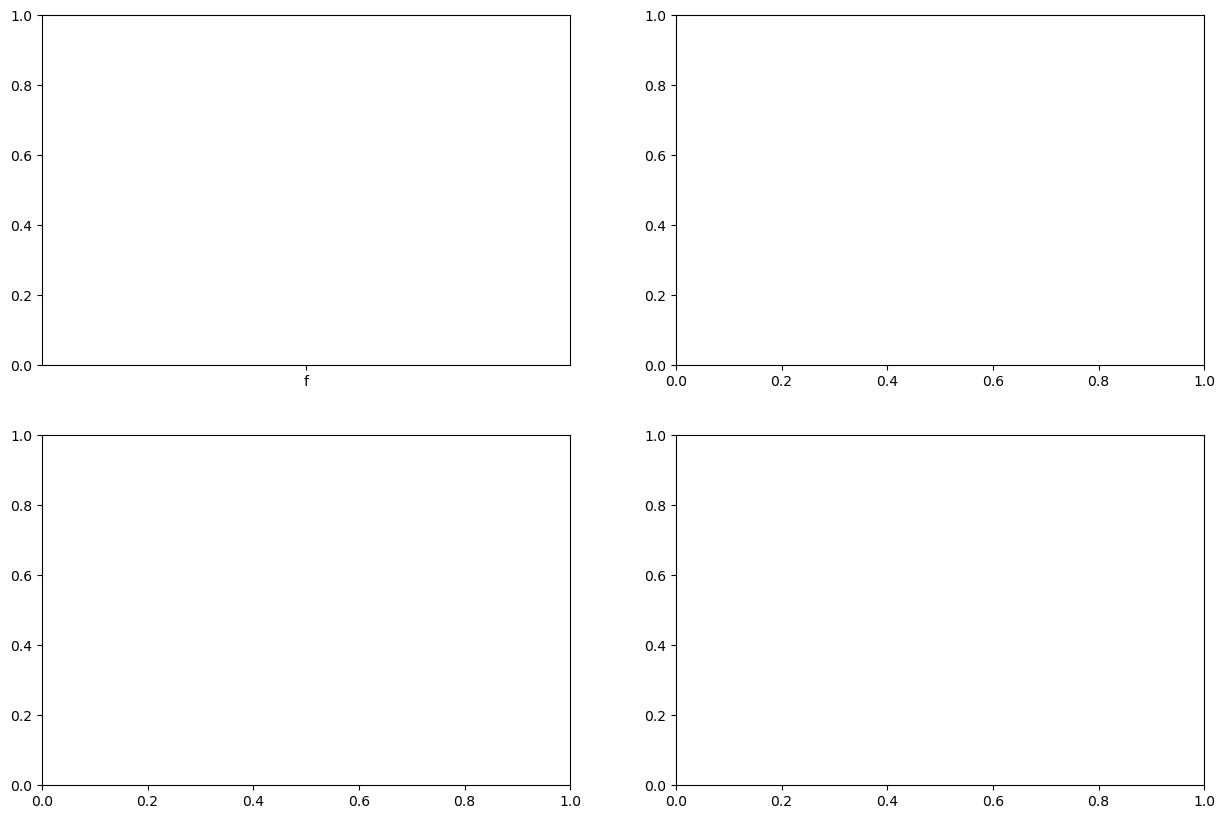

In [10]:
import matplotlib.pyplot as plt

# Extract the weights for the first four tICs
weights_tICs = eigenvectors_normalized[:, :4]

# Generate four subplots, one for each tIC
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Reshape axs to be one-dimensional
axs = axs.flatten()

# Loop over each tIC
for i in range(4):
    # Sort features by absolute weight for the i-th tIC
    sorted_features = [x for _, x in sorted(zip(np.abs(weights_tICs[:, i]), feature_names))]
    sorted_weights = sorted(weights_tICs[:, i])
    
    # Plot the weights of each feature
    axs[i].bar(sorted_features, sorted_weights)
    
    # Set the title
    axs[i].set_title(f'tIC {i+1}')
    
    # Set the x-axis label
    axs[i].set_xlabel('Feature')
    
    # Set the y-axis label
    axs[i].set_ylabel('Weight')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_1507695/2709779281.py:2: RuntimeWarning: invalid value encountered in log
  implied_timescales = -20 / np.log(eigenvalues)


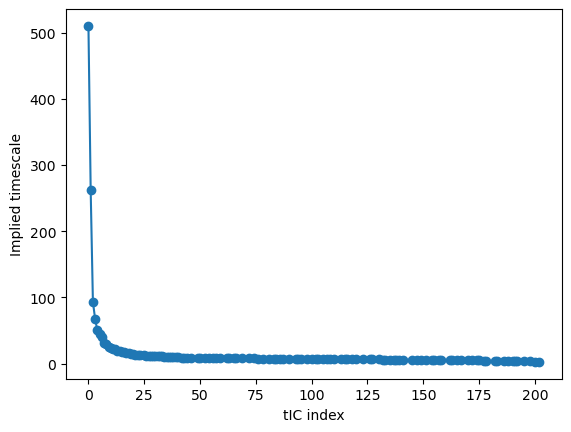

In [11]:
eigenvalues = tica_dev.eigenvalues
implied_timescales = -20 / np.log(eigenvalues)
plt.plot(implied_timescales, 'o-')
plt.xlabel('tIC index')
plt.ylabel('Implied timescale')
plt.show()


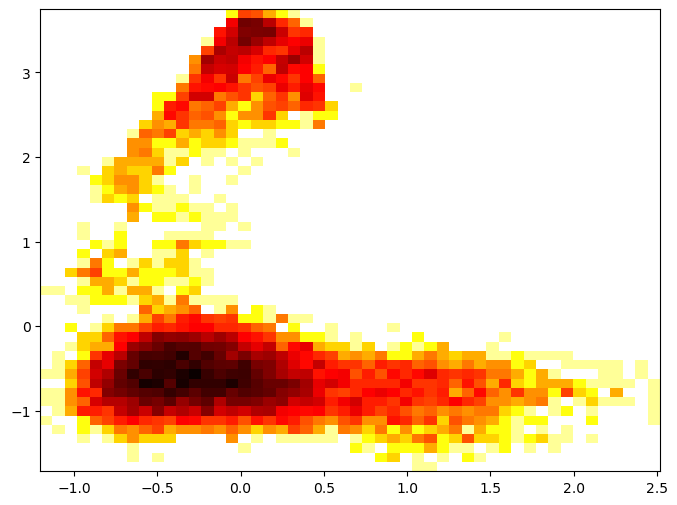

In [92]:
# Assuming tica_concatenated is your tICA result, and you're taking the first two dimensions
x = tica_concatenated[:, 0]
y = tica_concatenated[:, 1]

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50, density=True)
    
# Convert histogram to free energy
free_energy = -np.log(hist + 1e-10)
    
# Create a new figure
plt.figure(figsize=(8, 6))

# Plot free energy surface with the 'viridis' colormap
plt.imshow(free_energy, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot',vmax=5)


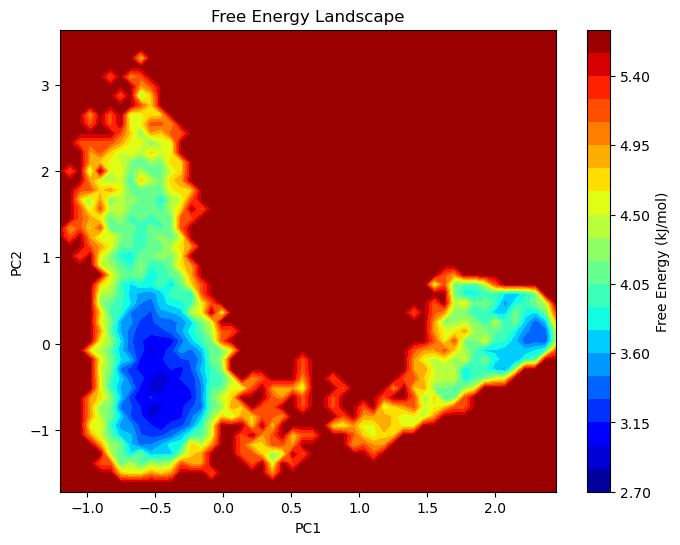

In [77]:
hist, x_edges, y_edges = np.histogram2d(tica_concatenated[:, 0], tica_concatenated[:, 1], bins=50, density=True)

# Convert histogram counts to probabilities
prob = hist / np.sum(hist)

# Set the values where the probability is zero to a small non-zero value to avoid division by zero
min_nonzero_prob = np.min(prob[np.nonzero(prob)])
prob[prob == 0] = min_nonzero_prob

# Calculate the free energy values
kT = 0.6  # Boltzmann's constant times temperature (in kJ/mol), assuming 300K room temperature

# Calculate free energy
free_energy = -kT * np.log(prob)

plt.figure(figsize=(8, 6))
# Create contour plot with heatmap colors
contour = plt.contourf(x_edges[:-1], y_edges[:-1], free_energy.T, levels=20, cmap='jet')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Free Energy (kJ/mol)')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Free Energy Landscape')
# plt.savefig('fes_tor.png',dpi=300)
plt.show()



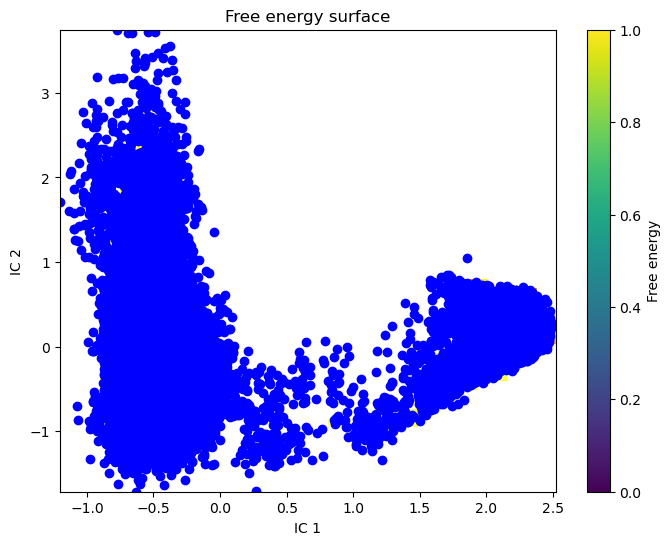

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming tica_concatenated is your tICA result, and you're taking the first two dimensions
x = tica_concatenated[:, 0]
y = tica_concatenated[:, 1]

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=50, density=True)
# hist = hist.T
# Convert histogram to free energy
# free_energy = -np.log(hist + 1e-10)
free_energy = -kT * np.log(prob)

# Identify points below a certain free energy level
threshold = 6  # define a threshold of free energy

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot free energy surface with the 'viridis' colormap
plt.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot',vmax=5)

# Identify the bins that correspond to a free energy below the threshold
dense_bins = free_energy < threshold

# Get the indices of the x and y coordinates that fall into the dense bins
x_indices = np.digitize(x, xedges[:-1]) - 1  # we subtract 1 because numpy's digitize function uses 1-based indexing
y_indices = np.digitize(y, yedges[:-1]) - 1

# Get the indices of the frames that are within the dense bins
dense_frame_indices = dense_bins[y_indices, x_indices]
# dense_frame_indices = dense_frame_indices.T

# Plot these points
plt.scatter(x[dense_frame_indices], y[dense_frame_indices], color='b')

# Add colorbar
plt.colorbar(label='Free energy')

plt.xlabel('IC 1')
plt.ylabel('IC 2')

plt.title('Free energy surface')

plt.show()


/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/3836479556.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


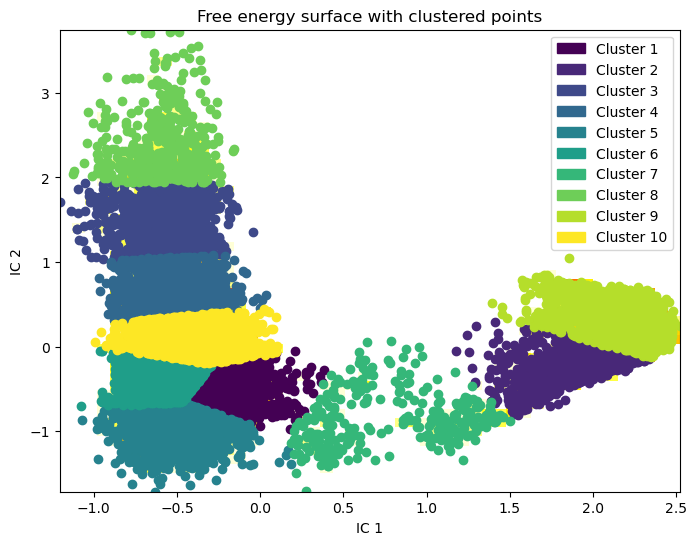

In [120]:
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Create an array of the dense points
dense_points = np.array([x[dense_frame_indices], y[dense_frame_indices]]).T

# Define the number of clusters
n_clusters = 10

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dense_points)

# Get the cluster labels for each point
labels = kmeans.labels_

# Create a color map
cmap = plt.cm.get_cmap('viridis', n_clusters)

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the free energy surface
ax.imshow(free_energy.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot', vmax=5)

# Create list for legend handles
legend_handles = []

# Loop over each cluster and plot
for i in range(n_clusters):
    cluster_points = dense_points[labels == i]
    scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cmap(i)], label=f'Cluster {i+1}')
    legend_handles.append(mpatches.Patch(color=cmap(i), label=f'Cluster {i+1}'))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
ax.set_title('Free energy surface with clustered points')

# Add legend using the handles
ax.legend(handles=legend_handles)

plt.show()


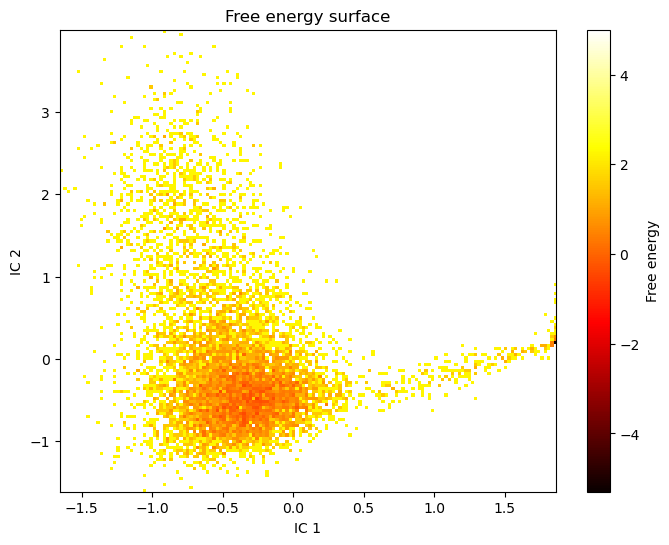

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/2120317498.py:62: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


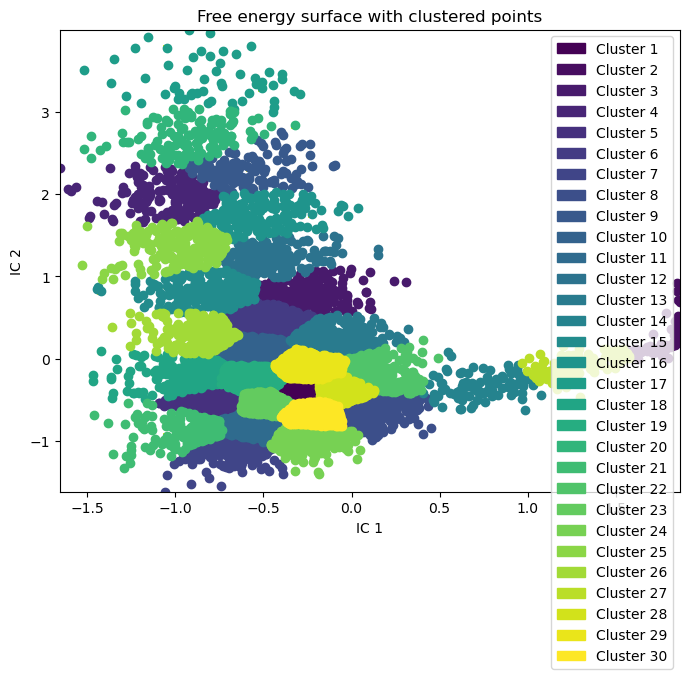

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Function for plotting the free energy surface
def plot_free_energy_surface(tica_concatenated):
    # Assuming tica_concatenated is your tICA result, and you're taking the first two dimensions
    x = tica_concatenated[:, 0]
    y = tica_concatenated[:, 1]

    # Compute 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=150, density=True)
    hist  = hist.T

    # Convert histogram to free energy
    free_energy = -np.log(hist + 1e-10)

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Plot free energy surface with the 'hot' colormap
    plt.imshow(free_energy, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot', vmax=5)

    plt.colorbar(label='Free energy')
    plt.xlabel('IC 1')
    plt.ylabel('IC 2')
    plt.title('Free energy surface')

    plt.show()
    return x, y, free_energy, xedges, yedges

# Function for identifying dense regions and clustering
def identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges, threshold=4, n_clusters=30):
    # Identify the bins that correspond to a free energy below the threshold
    dense_bins = free_energy < threshold

    # Get the indices of the x and y coordinates that fall into the dense bins
    x_indices = np.digitize(x, xedges[:-1]) - 1  # we subtract 1 because numpy's digitize function uses 1-based indexing
    y_indices = np.digitize(y, yedges[:-1]) - 1

    # Get the indices of the frames that are within the dense bins
    dense_frame_indices = dense_bins[y_indices, x_indices]

    # Create an array of the dense points
    dense_points = np.array([x[dense_frame_indices], y[dense_frame_indices]]).T

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dense_points)

    # Get the cluster labels for each point
    labels = kmeans.labels_

    # Plot the results
    plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters)

    return labels

# Function for plotting the results
def plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters):
    # Create a color map
    cmap = plt.cm.get_cmap('viridis', n_clusters)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the free energy surface
    ax.imshow(free_energy, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot', vmax=5)

    # Create list for legend handles
    legend_handles = []

    # Loop over each cluster and plot
    for i in range(n_clusters):
        cluster_points = dense_points[labels == i]
        scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cmap(i)], label=f'Cluster {i+1}')
        legend_handles.append(mpatches.Patch(color=cmap(i), label=f'Cluster {i+1}'))

    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    ax.set_title('Free energy surface with clustered points')

    # Add legend using the handles
    ax.legend(handles=legend_handles)

    plt.show()

# Main script
x, y, free_energy, xedges, yedges = plot_free_energy_surface(tica_concatenated)
labels = identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges)


In [125]:
import numpy as np
# Count the occurrences of each label
counts = np.bincount(labels)
# Get the label of the least populated cluster
least_populated = np.argmin(counts)
print(f'The least populated cluster is {least_populated} with {counts[least_populated]} points.')
# Get the label of the most populated cluster
most_populated = np.argmax(counts)
print(f'The most populated cluster is {most_populated} with {counts[most_populated]} points.')


The least populated cluster is 6 with 288 points.
The most populated cluster is 9 with 1818 points.


In [126]:
import numpy as np

# Count the occurrences of each label
counts = np.bincount(labels)

# Get the indices that would sort the counts
sorted_indices = np.argsort(counts)

# Get the labels of the 3 least populated clusters
least_populated = sorted_indices[:3] + 1  # add 1 to start labels from 1

# Get the labels of the 3 most populated clusters
most_populated = sorted_indices[-3:] + 1  # add 1 to start labels from 1

# Loop over the least populated clusters and print
for i, cluster in enumerate(least_populated, start=1):
    print(f'The {i}th least populated cluster is {cluster} with {counts[cluster-1]} points.')  # subtract 1 for correct count

# Loop over the most populated clusters and print
for i, cluster in enumerate(most_populated, start=1):
    print(f'The {i}th most populated cluster is {cluster} with {counts[cluster-1]} points.')  # subtract 1 for correct count


The 1th least populated cluster is 7 with 288 points.
The 2th least populated cluster is 8 with 424 points.
The 3th least populated cluster is 2 with 657 points.
The 1th most populated cluster is 6 with 1494 points.
The 2th most populated cluster is 5 with 1708 points.
The 3th most populated cluster is 10 with 1818 points.


In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Function for plotting the free energy surface
def plot_free_energy_surface(tica_concatenated):
    # Assuming tica_concatenated is your tICA result, and you're taking the first two dimensions
    x = tica_concatenated[:, 0]
    y = tica_concatenated[:, 1]

    # Compute 2D histogram
    hist, xedges, yedges = np.histogram2d(x, y, bins=150, density=True)
    hist  = hist.T

    # Convert histogram to free energy
    free_energy = -np.log(hist + 1e-10)

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Plot free energy surface with the 'hot' colormap
    plt.imshow(free_energy, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot', vmax=5)

    plt.colorbar(label='Free energy')
    plt.xlabel('IC 1')
    plt.ylabel('IC 2')
    plt.title('Free energy surface')

    plt.show()
    return x, y, free_energy, xedges, yedges

# Function for identifying dense regions and clustering
def identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges, threshold=4, n_clusters=30):
    # Identify the bins that correspond to a free energy below the threshold
    dense_bins = free_energy < threshold

    # Get the indices of the x and y coordinates that fall into the dense bins
    x_indices = np.digitize(x, xedges[:-1]) - 1  # we subtract 1 because numpy's digitize function uses 1-based indexing
    y_indices = np.digitize(y, yedges[:-1]) - 1

    # Get the indices of the frames that are within the dense bins
    dense_frame_indices = dense_bins[y_indices, x_indices]

    # Create an array of the dense points
    dense_points = np.array([x[dense_frame_indices], y[dense_frame_indices]]).T

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dense_points)

    # Get the cluster labels for each point
    labels = kmeans.labels_

    return dense_points, labels

# Function for plotting the results
def plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters):
    # Create a color map
    cmap = plt.cm.get_cmap('viridis', n_clusters)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the free energy surface
    ax.imshow(free_energy, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot', vmax=5)

    # Create list for legend handles
    legend_handles = []

    # Loop over each cluster and plot
    for i in range(n_clusters):
        cluster_points = dense_points[labels == i]
        scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cmap(i)], label=f'Cluster {i+1}')
        legend_handles.append(mpatches.Patch(color=cmap(i), label=f'Cluster {i+1}'))

    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    ax.set_title('Free energy surface with clustered points')

    # Add legend using the handles
    ax.legend(handles=legend_handles)

    plt.show()

# Function for identifying and plotting least populated clusters
def plot_least_populated_clusters(dense_points, labels, n_clusters, n_least_populated):
    # Count the number of points in each cluster
    counts = np.bincount(labels)
    
    # Find the indices of the n least populated clusters
    least_populated_clusters = np.argsort(counts)[:n_least_populated]

    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a color map
    cmap = plt.cm.get_cmap('viridis', n_clusters)

    # Loop over each cluster and plot if it's one of the least populated clusters
    for i in least_populated_clusters:
        cluster_points = dense_points[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cmap(i)], label=f'Cluster {i+1}')

    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    ax.set_title('Least populated clusters')

    plt.show()


# Function for identifying and plotting most populated clusters
def plot_most_populated_clusters(dense_points, labels, n_clusters, n_most_populated):
    # Count the number of points in each cluster
    counts = np.bincount(labels)
    
    # Find the indices of the n most populated clusters
    most_populated_clusters = np.argsort(counts)[-n_most_populated:]

    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create a color map
    cmap = plt.cm.get_cmap('viridis', n_clusters)

    # Loop over each cluster and plot if it's one of the most populated clusters
    for i in most_populated_clusters:
        cluster_points = dense_points[labels == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[cmap(i)], label=f'Cluster {i+1}')

    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
    ax.set_title('Most populated clusters')

    plt.show()


# Function for identifying the frames of the least populated clusters
def identify_least_populated_frames(labels, n_clusters, n_least_populated, dense_frame_indices):
    # Count the number of points in each cluster
    counts = np.bincount(labels)
    
    # Find the indices of the n least populated clusters
    least_populated_clusters = np.argsort(counts)[:n_least_populated]

    # Find the frames corresponding to these clusters
    least_populated_frames = np.where(np.isin(labels, least_populated_clusters))[0]

    # Map back to original frame indices
    original_frame_indices = dense_frame_indices[least_populated_frames]
    print(original_frame_indices)

    return original_frame_indices
def identify_most_populated_frames(labels, n_clusters, n_most_populated):
    # Count the number of points in each cluster
    counts = np.bincount(labels)

    # Find the indices of the n most populated clusters
    most_populated_clusters = np.argsort(counts)[-n_most_populated:]
    print(most_populated_clusters)

    # Identify the original frame indices of the most populated clusters
    original_frame_indices = []
    for cluster in most_populated_clusters:
        original_frame_indices.extend(np.where(labels == cluster)[0])

    return np.array(original_frame_indices)


# Function for extracting frames from trajectory
def extract_frames_from_trajectory(original_frame_indices, universe, output_directory):
    # Sort the indices for sequential access
    sorted_indices = np.sort(original_frame_indices)
    print(sorted_indices)

    # Loop over sorted indices and write each frame to a separate PDB file
    for i, frame_index in enumerate(sorted_indices):
        universe.trajectory[frame_index]  # This line changes the current frame of the universe
        output_file_path = f'gro/frame_{i+1}.gro'
        with mda.Writer(output_file_path, universe.atoms.n_atoms) as W:
            W.write(universe.atoms)

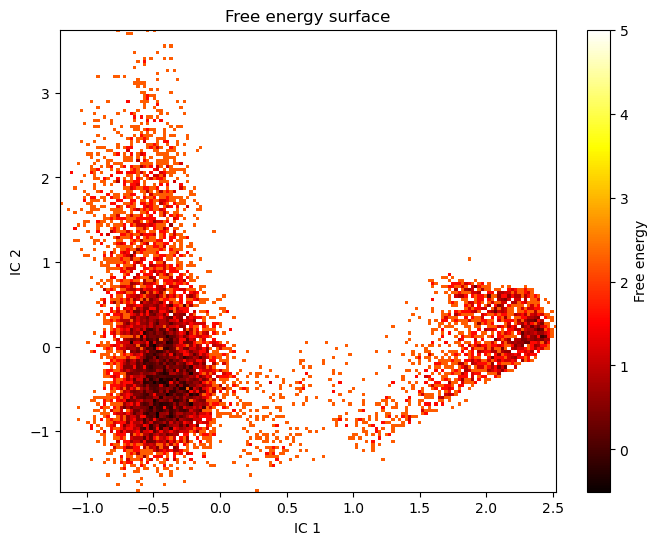

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/3748354444.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


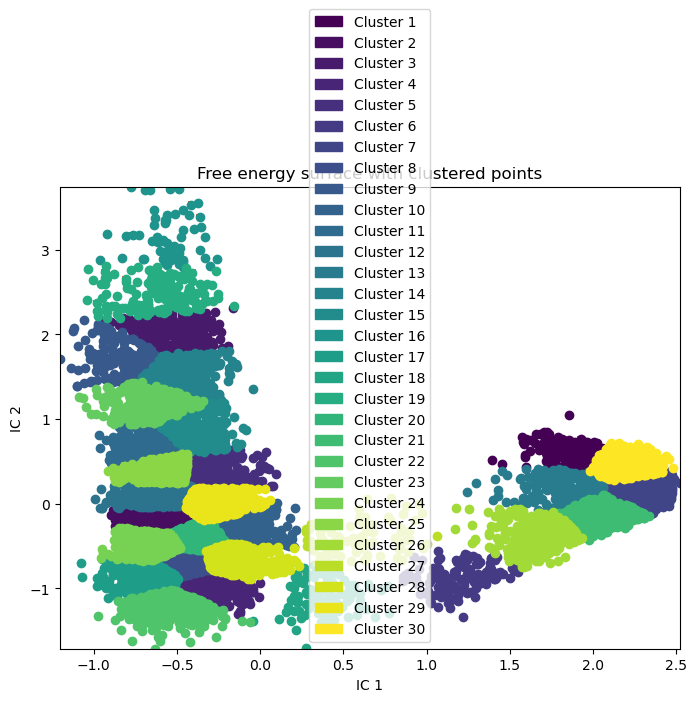

/tmp/ipykernel_3153696/3748354444.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


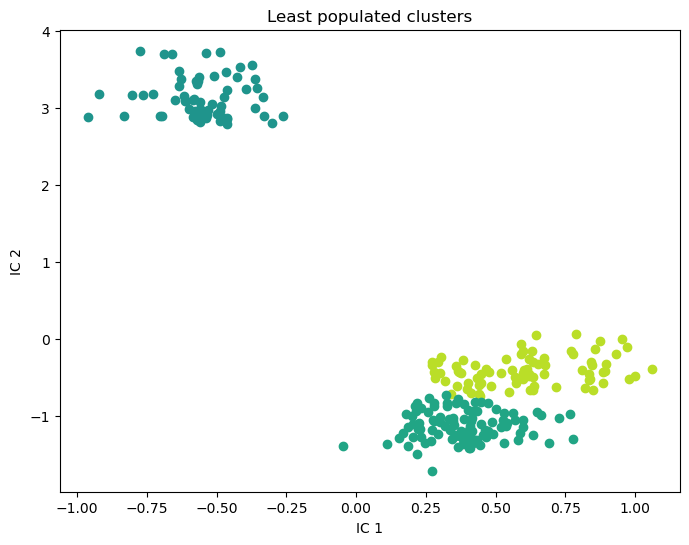

In [131]:
# Main script
x, y, free_energy, xedges, yedges = plot_free_energy_surface(tica_concatenated)
dense_points, labels = identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges,threshold=4,)
plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters=30)
plot_least_populated_clusters(dense_points, labels, n_clusters=30, n_least_populated=3)

In [145]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

# Assuming tica_concatenated is your tICA result, and you're taking the first two dimensions
x = tica_concatenated[:, 0]
y = tica_concatenated[:, 1]

# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=150, density=True)
hist = hist.T
# Convert histogram to free energy
free_energy = -np.log(hist + 1e-10)

# Identify points below a certain free energy level
threshold = 4  # define a threshold of free energy

# Identify the bins that correspond to a free energy below the threshold
dense_bins = free_energy < threshold

# Get the indices of the x and y coordinates that fall into the dense bins
x_indices = np.digitize(x, xedges[:-1]) - 1  # we subtract 1 because numpy's digitize function uses 1-based indexing
y_indices = np.digitize(y, yedges[:-1]) - 1

# Get the indices of the frames that are within the dense bins
dense_frame_indices = np.where(dense_bins[y_indices, x_indices])[0]
print(dense_frame_indices)
print(dense_frame_indices.shape)
# Create an array of the dense points
dense_points = tica_concatenated[dense_frame_indices]

# Define the number of clusters
n_clusters = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dense_points)

# Get the cluster labels for each point
labels = kmeans.labels_


[    0     1     2 ... 10698 10699 10700]
(10701,)


/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [147]:
# Create a dictionary to store each cluster's original indices
cluster_to_indices = {}

# Loop through each unique label (i.e., each cluster)
for cluster_id in np.unique(labels):
    # Initialize an empty list to store this cluster's indices
    cluster_to_indices[cluster_id] = []
    
    # Get the data points belonging to this cluster
    cluster_points = dense_points[labels == cluster_id]
    print(cluster_points)
    
    # Loop through each data point in this cluster
    for point in cluster_points:
        # Find the index of this data point in the original `tica_concatenated` array
        # (We use np.all to compare two arrays element-wise)
        original_index = np.where(np.all(tica_concatenated == point, axis=1))[0]
        
        # Add the original index to this cluster's list of indices
        cluster_to_indices[cluster_id].extend(original_index)
        print(cluster_to_indices)

# Now `cluster_to_indices` is a dictionary mapping each cluster ID to a list of the original indices of its data points


[[1.4536242  0.4654002 ]
 [1.5982391  0.43737504]
 [1.7979777  0.5966183 ]
 [1.8122654  0.5777287 ]
 [1.8820434  0.58489645]
 [1.8158367  0.5927701 ]
 [1.9417694  0.58382875]
 [1.9393578  0.57241696]
 [1.9382443  0.64205474]
 [1.9663569  0.5517375 ]
 [1.8644029  0.43597242]
 [1.8026189  0.43124348]
 [1.7607435  0.42012545]
 [1.8785638  0.4783215 ]
 [1.8894422  0.4040821 ]
 [1.9263616  0.4423835 ]
 [1.9149132  0.40276816]
 [1.8831466  0.42745885]
 [2.000474   0.5536535 ]
 [2.0067077  0.5048842 ]
 [1.9562654  0.39298642]
 [1.9632119  0.4487664 ]
 [2.0008006  0.5939297 ]
 [2.0532825  0.6609117 ]
 [2.0309246  0.6374946 ]
 [1.9440569  0.4526652 ]
 [1.9152787  0.61855346]
 [1.9462981  0.53599256]
 [1.9362774  0.62660104]
 [1.8633913  0.6692393 ]
 [1.8056343  0.67600036]
 [1.6530144  0.7185351 ]
 [1.7696607  0.67841995]
 [1.805181   0.7228663 ]
 [1.8750439  0.66071594]
 [1.7986989  0.5796219 ]
 [1.7274635  0.617707  ]
 [1.7141914  0.5082824 ]
 [1.7734755  0.5058219 ]
 [1.7761542  0.6095317 ]


/tmp/ipykernel_3153696/1281627122.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  original_index = np.where(np.all(tica_concatenated == point, axis=1))[0]


AxisError: axis 1 is out of bounds for array of dimension 0

In [45]:
import os
import shutil
import MDAnalysis as mda
import numpy as np

# Define the output directory
output_dir = 'gro'

# If the directory already exists, remove it
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

# Create the directory
os.makedirs(output_dir)

tlist=['../../trajdat/dat2/rep1_tot.xtc','../../trajdat/dat2/rep2_tot.xtc','../../trajdat/dat2/rep3_tot.xtc',\
       '../../trajdat/dat2/rep4.xtc','../../trajdat/dat2/rep6_tot2.xtc','../../trajdat/dat/1_tot.xtc','../../trajdat/dat/3_tot.xtc',\
        '../../trajdat/dat/5_tot.xtc','../../trajdat/dat/9_tot.xtc']


In [46]:
# Load the original trajectories
topology_file = '../../trajdat/dat/gro.gro'  # Replace with the path to your topology file
universe = mda.Universe(topology_file, tlist)


In [135]:
import os

path = '../../adaptive_sampling_trajs/send/'
files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.xtc')]

for file in files:
    print(file)


../../adaptive_sampling_trajs/send/10.xtc
../../adaptive_sampling_trajs/send/1.xtc
../../adaptive_sampling_trajs/send/34.xtc
../../adaptive_sampling_trajs/send/33.xtc
../../adaptive_sampling_trajs/send/32.xtc
../../adaptive_sampling_trajs/send/35.xtc
../../adaptive_sampling_trajs/send/31.xtc
../../adaptive_sampling_trajs/send/15.xtc
../../adaptive_sampling_trajs/send/20.xtc
../../adaptive_sampling_trajs/send/5.xtc
../../adaptive_sampling_trajs/send/30.xtc


In [140]:
files = ['../../adaptive_sampling_trajs/send/1.xtc','../../adaptive_sampling_trajs/send/5.xtc','../../adaptive_sampling_trajs/send/10.xtc',\
        '../../adaptive_sampling_trajs/send/15.xtc','../../adaptive_sampling_trajs/send/20.xtc','../../adaptive_sampling_trajs/send/25.xtc',\
        '../../adaptive_sampling_trajs/send/30.xtc','../../adaptive_sampling_trajs/send/31.xtc','../../adaptive_sampling_trajs/send/32.xtc',\
        '../../adaptive_sampling_trajs/send/33.xtc''../../adaptive_sampling_trajs/send/34.xtc''../../adaptive_sampling_trajs/send/35.xtc']

In [137]:
# Load the original trajectories
topology_file = '../../trajdat/dat/gro.gro'  # Replace with the path to your topology file
universe = mda.Universe(topology_file, files)

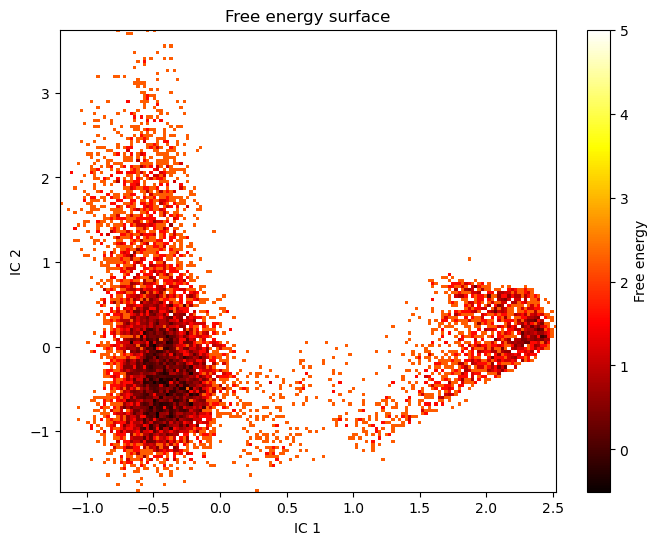

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/3537744884.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


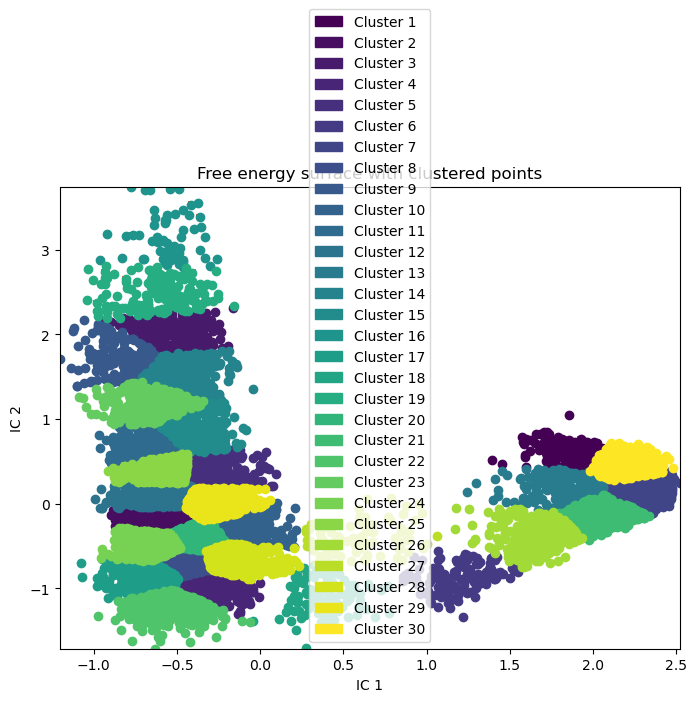

/tmp/ipykernel_3153696/3537744884.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


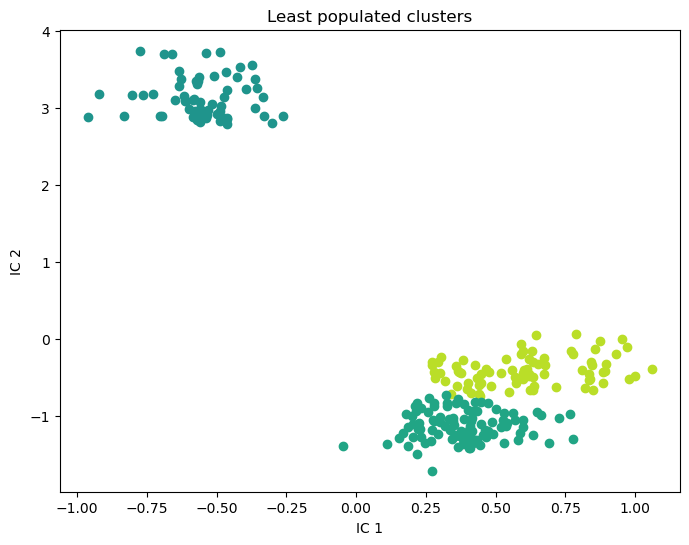

[    0   751   753   759   762   768   769   770   773   774   775   776
   777   778   779   780   781   782   784   811   830   832   833   834
   835   836   837   838   841   843   846   856   858   859   862   866
   867   868   870   871   872   873   874   875   876   879   880   906
   913   914   915   916   919   920  2849  2850  2851  2852  2853  2864
  2865  2866  2867  2868  2869  2870  2871  2872  2873  2874  2875  2876
  2877  2878  2879  2880  2881  2882  2883  2884  2885  2886  2887  2888
  2889  2890  2891  2892  2893  2894  2895  2896  2897  2898  2899  2900
  2901  2902  2903  2904  2905  2906  2907  2908  2910  2911  2912  2913
  2914  2915  2916  2918  2923  2924  2925  3835  3836  3837  3838  3839
  3840  3841  3843  3844  4442  4724  4734  4935  5806  5807  5808  5809
  5810  5811  5812  5813  5814  5815  5816  5817  5818  6781  6782  6783
  6784  7761  7762  7763  7764  7765  7766  7767  7768  8069  8169  8174
  8197  8230  8347  8349  8355  9736  9737  9738  9

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [159]:


# Main script
x, y, free_energy, xedges, yedges = plot_free_energy_surface(tica_concatenated)
dense_points, labels = identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges)
plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters=30)
plot_least_populated_clusters(dense_points, labels, n_clusters=30, n_least_populated=3)

# Identify the frames of the least populated clusters
original_frame_indices = identify_least_populated_frames(labels, n_clusters=30, n_least_populated=3, dense_frame_indices=dense_frame_indices)

# Extract these frames from the original trajectories
extract_frames_from_trajectory(original_frame_indices, universe, output_directory='/gro')


In [77]:
import random

# Function for extracting frames from trajectory
def extract_frames_from_trajectory(original_frame_indices, universe, output_directory, n_frames=10):
    # Randomly select a subset of the original frame indices if there are more than n_frames
    if len(original_frame_indices) > n_frames:
        frame_indices = random.sample(list(original_frame_indices), n_frames)
    else:
        frame_indices = original_frame_indices

    # Sort the indices for sequential access
    sorted_indices = np.sort(frame_indices)

    # Loop over sorted indices and write each frame to a separate GRO file
    for i, frame_index in enumerate(sorted_indices):
        universe.trajectory[frame_index]  # This line changes the current frame of the universe
        output_file_path = f'{output_directory}/frame_{i+1}.gro'
        with mda.Writer(output_file_path, universe.atoms.n_atoms) as W:
            W.write(universe.atoms)

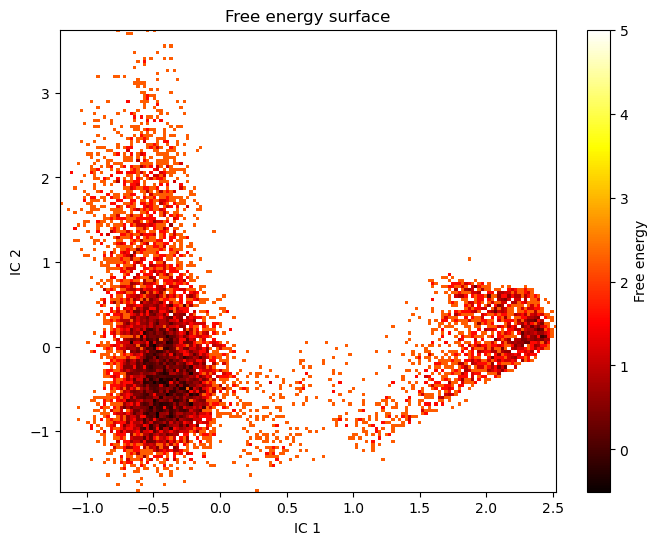

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/3537744884.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


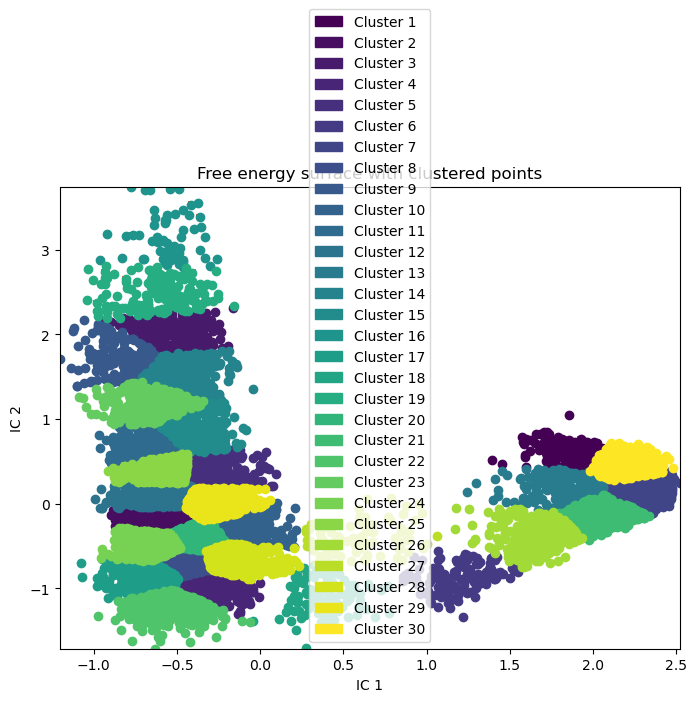

/tmp/ipykernel_3153696/3537744884.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


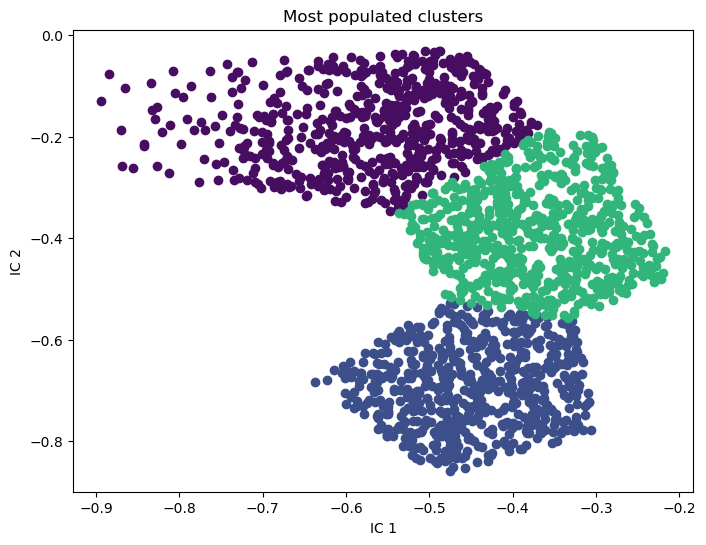

TypeError: identify_most_populated_frames() got an unexpected keyword argument 'dense_frame_indices'

In [157]:


# Main script
x, y, free_energy, xedges, yedges = plot_free_energy_surface(tica_concatenated)
dense_points, labels = identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges)
plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters=30)
plot_most_populated_clusters(dense_points, labels, n_clusters=30, n_most_populated=3)

# Identify the frames of the least populated clusters
original_frame_indices = identify_most_populated_frames(labels, n_clusters=30, n_most_populated=3, dense_frame_indices=dense_frame_indices)

# Extract these frames from the original trajectories
extract_frames_from_trajectory(original_frame_indices, universe, output_directory='gro')


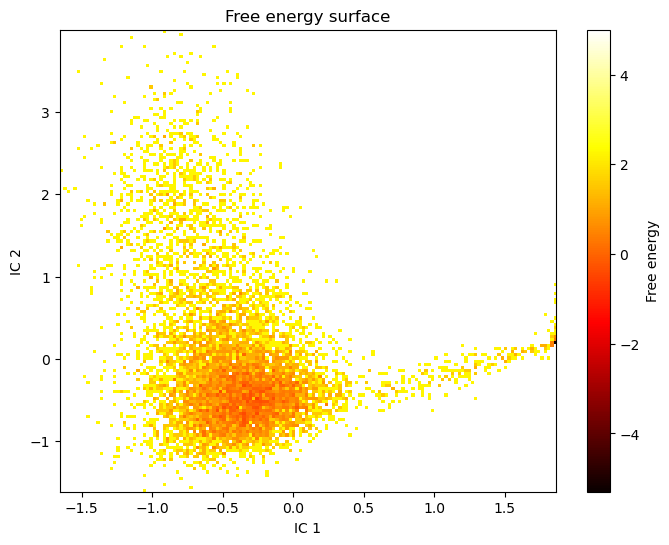

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_3153696/2119963618.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


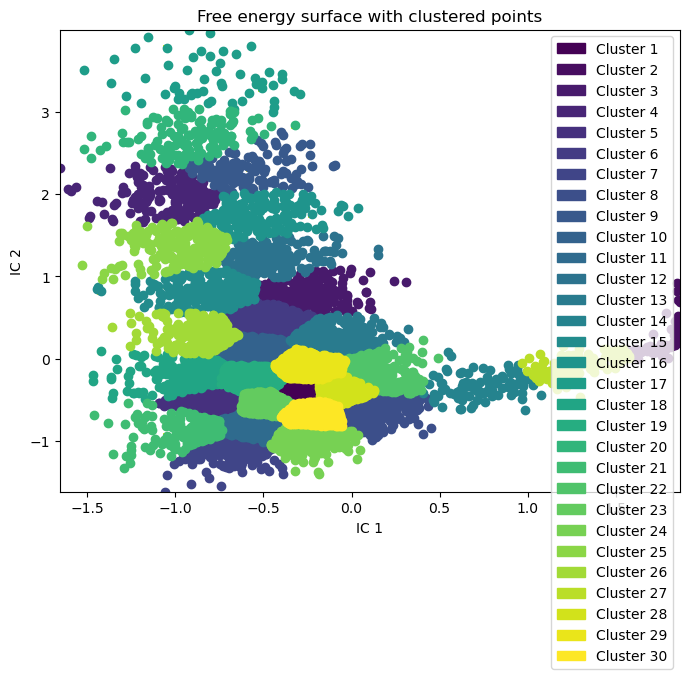

/tmp/ipykernel_3153696/3626946526.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


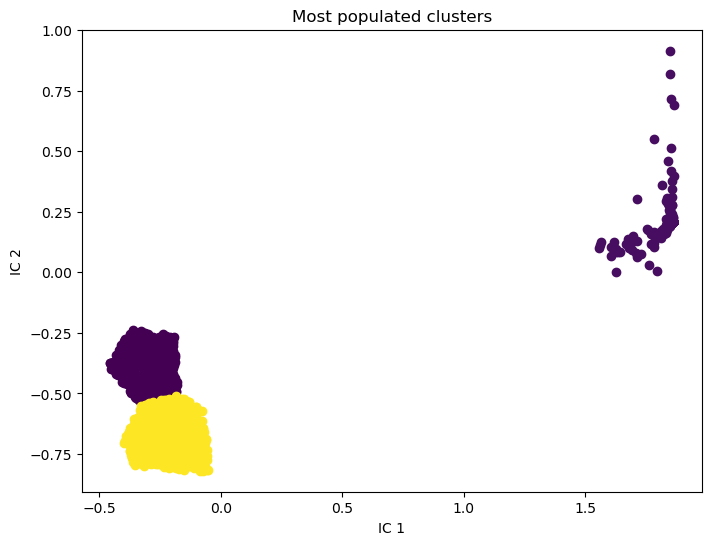

[ 0 29  1]


NameError: name 'extract_frames_from_trajectory' is not defined

In [28]:
def identify_most_populated_frames(labels, n_clusters, n_most_populated):
    # Count the number of points in each cluster
    counts = np.bincount(labels)

    # Find the indices of the n most populated clusters
    most_populated_clusters = np.argsort(counts)[-n_most_populated:]
    print(most_populated_clusters)

    # Identify the original frame indices of the most populated clusters
    original_frame_indices = []
    for cluster in most_populated_clusters:
        original_frame_indices.extend(np.where(labels == cluster)[0])

    return np.array(original_frame_indices)

# Main script
x, y, free_energy, xedges, yedges = plot_free_energy_surface(tica_concatenated)
dense_points, labels = identify_dense_regions_and_cluster(tica_concatenated, x, y, free_energy, xedges, yedges)
plot_clusters_on_free_energy_surface(free_energy, xedges, yedges, dense_points, labels, n_clusters=30)
plot_most_populated_clusters(dense_points, labels, n_clusters=30, n_most_populated=3)

# Identify the frames of the most populated clusters
original_frame_indices = identify_most_populated_frames(labels, n_clusters=30, n_most_populated=3)

# Extract these frames from the original trajectories
extract_frames_from_trajectory(original_frame_indices, universe, output_directory='gro2')


In [148]:
# Function for extracting frames from trajectory
def extract_frames_from_trajectory(frame_indices_by_cluster, universe, output_directory, n_frames=10):
    # Loop over each cluster
    for cluster, original_frame_indices in frame_indices_by_cluster.items():
        # Randomly select a subset of the original frame indices if there are more than n_frames
        if len(original_frame_indices) > n_frames:
            frame_indices = random.sample(list(original_frame_indices), n_frames)
        else:
            frame_indices = original_frame_indices

        # Sort the indices for sequential access
        sorted_indices = np.sort(frame_indices)

        # Create a directory for each cluster
        cluster_directory = os.path.join(output_directory, f'cluster_{cluster}')
        os.makedirs(cluster_directory, exist_ok=True)

        # Loop over sorted indices and write each frame to a separate GRO file
        for i, frame_index in enumerate(sorted_indices):
            universe.trajectory[frame_index]  # This line changes the current frame of the universe
            output_file_path = f'{cluster_directory}/frame_{i+1}.gro'
            with mda.Writer(output_file_path, universe.atoms.n_atoms) as W:
                W.write(universe.atoms)


In [150]:
import random

In [153]:
# Create dictionary of frame indices by cluster
frame_indices_by_cluster = {}
for i in range(n_clusters):
    frame_indices_by_cluster[i] = np.where(labels == i)[0]

# Extract these frames from the original trajectories
extract_frames_from_trajectory(frame_indices_by_cluster, universe, output_directory='gro')
